In [1]:
import numpy as np
import Labber
import matplotlib.pyplot as plt
from matplotlib import cm
import lmfit as lm
# Uncomment for latex rendering in python
# plt.rc('text', usetex=True)
# plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics}')
# plt.rc('font', **{'family':'sans-serif'} )

In [8]:
# Load numpy file without a Labber installation

fin = r'..\..\Data\Fig2 Data\3Q Gate All State Swapping.hdf5'

log = Labber.LogFile(fin)
data = log.getData('State Discriminator 2 States - Population Qb3 0')

data = (np.reshape(data, (4, 2, -1))-np.mean(data.flatten()))*2

In [3]:
def cos_fit(t, data):
    def fun(t, A, phi, B):
        return A*np.cos(t - phi) + B
    cosModel = lm.Model(fun)
    params = cosModel.make_params()
    params['A'].set(value=np.max(data), min=0, max=1, vary=False)
    params['phi'].set(value=np.pi/2, min=-2*np.pi, max=2*np.pi)
    params['B'].set(value=0, min=-0.1, max=0.1)

    res = cosModel.fit(data, params, t=t)
    return res

phi = np.linspace(-2*np.pi, 2*np.pi, 101)

fit1 = cos_fit(phi, data[0, 0, :])
# fit1.plot_fit()
fit2 = cos_fit(phi, data[1, 0, :])
# fit2.plot_fit()
fit3 = cos_fit(phi, data[2, 0, :])
# fit3.plot_fit()
fit4 = cos_fit(phi, data[3, 0, :])
# fit4.plot_fit()
    

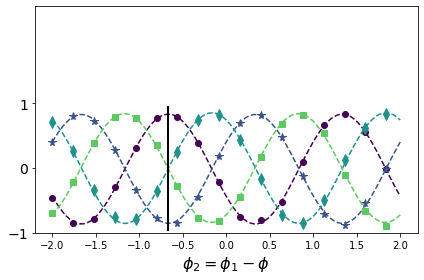

In [7]:
#Uncomment annotations if you have latex linked to your python installation

colors = cm.viridis(np.linspace(0, 1, 5))

phi = np.linspace(-2*np.pi, 2*np.pi, 101)/np.pi
fig, ax = plt.subplots()
ax.plot(phi[::6], data[0, 0, ::6], 'o', label=r'$\ket{1+0}$', color=colors[0], markersize=6)
ax.plot(phi, fit1.best_fit, '--', color=colors[0])
ax.plot(phi[::6], data[1, 0, ::6], '*', label=r'$\ket{1-0}$', color=colors[1], markersize=8)
ax.plot(phi, fit2.best_fit, '--', color=colors[1])
ax.plot(phi[::6], data[2, 0, ::6], 'd', label=r'$\ket{1i^{+}0}$', color=colors[2], markersize=8)
ax.plot(phi, fit3.best_fit, '--', color=colors[2])
ax.plot(phi[::6], data[3, 0, ::6], 's',label=r'$\ket{1i^{-}0}$', color=colors[3], markersize=6)
ax.plot(phi, fit4.best_fit, '--', color=colors[3])

plt.plot([-0.67]*2, [-0.95, 0.95], 'k', linewidth=2)
# plt.annotate(r'$\phi=0$', (-0.6,0.95), fontsize=14)
# plt.ylabel(r'$\langle IIX\rangle$', fontsize=16)
ax.yaxis.set_label_coords(-0.05, 0.28)
plt.ylim([-1, 2.5])
# plt.xticks([-2, -1, 0, 1, 2],fontsize=14, labels=[r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$',r'$2\pi$'])
plt.yticks(np.linspace(-1, 1, 3), fontsize=14)
plt.xlabel(r'$\phi_2 = \phi_1 - \phi$', fontsize=16)
# plt.legend(fontsize=14, loc='upper right', labelspacing=0.25)
plt.tight_layout()
plt.savefig(r'SwappingAngle.pdf', dpi=400)

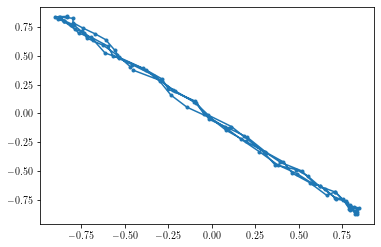

In [5]:
plt.plot(data[0,0,:], data[1,0,:], '.-')